/tmp/ipykernel_2315/749315279.py:28: RuntimeWarning: invalid value encountered in scalar divide
  result_alpha = (c1 * (Vi + c2)) / (1 - np.exp((- (Vi + c3)) / c4))


          0         1         2   3         4         5         6         7   \
0   0.000000  0.000000  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
1   0.000002  0.000038  0.000344 NaN  0.002464  0.002703  0.002200  0.001532   
2   0.000004  0.000079  0.000823 NaN  0.005240  0.004779  0.003405  0.002208   
3   0.000005  0.000111  0.001149 NaN  0.006430  0.005494  0.003800  0.002439   
4   0.000007  0.000140  0.001398 NaN  0.006987  0.005784  0.003951  0.002525   
..       ...       ...       ...  ..       ...       ...       ...       ...   
95  0.000018  0.000343  0.002421 NaN  0.007591  0.006006  0.004050  0.002578   
96  0.000018  0.000343  0.002421 NaN  0.007591  0.006006  0.004050  0.002578   
97  0.000018  0.000343  0.002421 NaN  0.007591  0.006006  0.004050  0.002578   
98  0.000018  0.000343  0.002421 NaN  0.007591  0.006006  0.004050  0.002578   
99  0.000018  0.000343  0.002421 NaN  0.007591  0.006006  0.004050  0.002578   

          8         9         10       

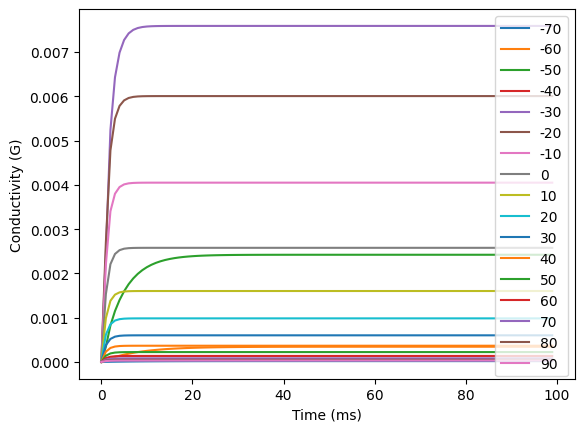

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Na parameters according to Alon:
# alpha m :
c1 = 0.1
c2 = 40
c3 = 40
c4 = 10
# beta m :
c5 = 4
c6 = 65
c7 = 18
# exponent of m :
c8 = 3
# alpha h :
c9 = 0.07
c10 = 65
c11 = 20
# beta h :
c12 = 35
c13 = 10


def alpha_m(Vi):
    result_alpha = (c1 * (Vi + c2)) / (1 - np.exp((- (Vi + c3)) / c4))
    return result_alpha

def beta_m(Vi):
    result_beta = c5 * np.exp(- (Vi + c6) / c7)
    return result_beta

def alpha_h(Vi):
    result_alpha = c9 * np.exp(- (Vi + c10) / c11)
    return result_alpha

def beta_h(Vi):
    result_beta = 1 / (1 + np.exp(- (Vi + c12) / c13))
    return result_beta

def _inf(alpha, beta):
    result_m_inf = alpha / (alpha + beta)
    return result_m_inf

def tau(alpha, beta):
    result_tau = 1 / (alpha + beta)
    return result_tau

def m_pow_x(m):
    result_m = m ** c8
    return result_m

def get_y(ti, Vi): # todo: debug to check that correct vals go to correct funcs
    alpha_m_ = alpha_m(Vi)
    beta_m_ = beta_m(Vi)
    alpha_h_ = alpha_h(Vi)
    beta_h_ = beta_h(Vi)
    m_inf_ = _inf(alpha_m_, beta_m_)
    tau_m_ = tau(alpha_m_, beta_m_)
    h_inf_ = _inf(alpha_h_, beta_h_)
    tau_h_ = tau(alpha_h_, beta_h_)
    m = m_inf_ * (1 - np.exp((-ti) / tau_m_))
    h = h_inf_ * (1 - np.exp((-ti) / tau_h_))
    y_hat = m_pow_x(m) * h
    return y_hat



dataset = []
n = 0
t_total = 100
VOLTS = np.arange(-70, 100, 10)
results = []

for V in VOLTS:
    voltage_results = []
    for t in np.arange(0, t_total):
        y = get_y(t, V)
        voltage_results.append(y)
        dataset.append((t, V, y))
    results.append(voltage_results)


graph_df = pd.DataFrame(results)
graph_df = graph_df.T
print(graph_df)
dataset_df = pd.DataFrame(dataset)
print(dataset_df)
graph_df.plot()
plt.legend(np.arange(-70, 100, 10))
plt.xlabel("Time (ms)")
plt.ylabel("Conductivity (G)")
plt.show()

# graph_df.to_csv('graph_df.csv', index=False)
# dataset_df.to_csv('dataset.csv', index=False)
